<a href="https://colab.research.google.com/github/Ayakhaled200/Projects/blob/main/Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/DS/Sunspots.csv')

In [ ]:
original_data

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [ ]:
original_data.drop(columns=['Month'], inplace=True)

In [ ]:
original_data.shape

(2820, 1)

In [ ]:
import pandas as pd

# Calculate the number of rows in the new DataFrame
num_rows = len(original_data) // 12

# Initialize a list to store the reshaped data
reshaped_data = []

# Reshape the original data into a 2D array with 12 columns
for i in range(num_rows):
    start_index = i * 12
    end_index = start_index + 12
    row_values = original_data.iloc[start_index:end_index].values.flatten().tolist()
    # Set the last value of the current row to be the first value of the next row
    if i < num_rows - 1:
        row_values[-1] = original_data.iloc[end_index]['Sunspots']
    reshaped_data.append(row_values)

# Create a DataFrame from the reshaped data
df = pd.DataFrame(reshaped_data)

# Display the resulting DataFrame
print(df)


        0      1      2      3      4      5      6      7      8      9   \
0     58.0   62.6   70.0   55.7   85.0   83.5   94.8   66.3   75.9   75.5   
1     73.3   75.9   89.2   88.3   90.0  100.0   85.4  103.0   91.2   65.7   
2     70.0   43.5   45.3   56.4   60.7   50.7   66.3   59.8   23.5   23.2   
3     35.0   50.0   71.0   59.3   59.7   39.6   78.4   29.3   27.1   46.6   
4     44.0   32.0   45.7   38.0   36.0   31.7   22.2   39.0   28.0   25.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
230  166.6  137.5  138.0  101.5  134.4  149.5  159.4  142.2  188.4  186.2   
231  159.6  155.0  126.2  164.1  179.9  157.3  136.3  135.4  155.0  164.7   
232  114.0  141.3  135.5  156.4  127.5   90.0  143.8  158.7  167.3  162.4   
233  111.2  163.6  153.8  122.0   82.2  110.4  106.1  107.6  118.8   94.7   
234   84.3   51.0   66.5   80.7   99.2   91.1   82.2   71.8   50.3   55.8   

        10     11  
0    158.6   73.3  
1     63.3   70.0  
2     28.5   35

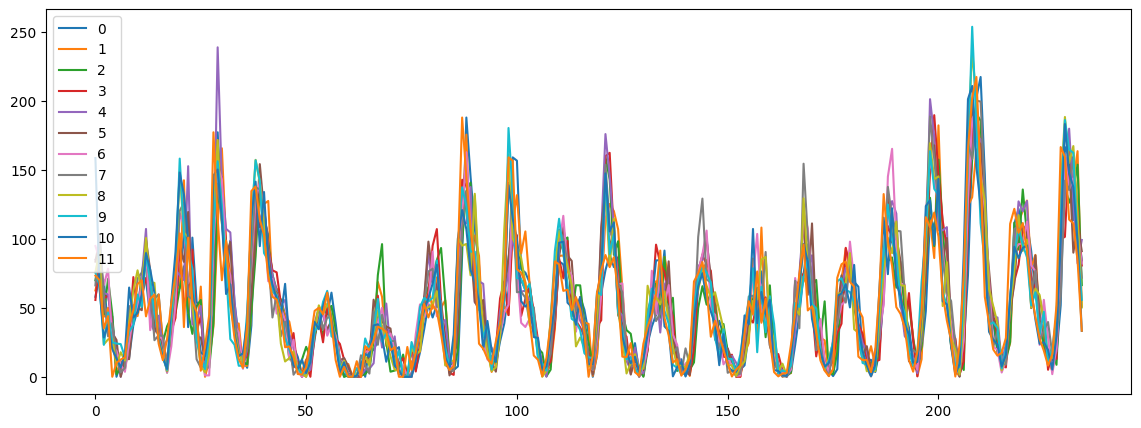

In [ ]:
import matplotlib.pyplot as plt

# Plot the DataFrame with a larger figsize
df.plot(kind='line', figsize=(14, 5))  # Adjust figsize as needed

# Display the plot
plt.show()

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,58.0,62.6,70.0,55.7,85.0,83.5,94.8,66.3,75.9,75.5,158.6,73.3
1,73.3,75.9,89.2,88.3,90.0,100.0,85.4,103.0,91.2,65.7,63.3,70.0
2,70.0,43.5,45.3,56.4,60.7,50.7,66.3,59.8,23.5,23.2,28.5,35.0
3,35.0,50.0,71.0,59.3,59.7,39.6,78.4,29.3,27.1,46.6,37.6,44.0
4,44.0,32.0,45.7,38.0,36.0,31.7,22.2,39.0,28.0,25.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,166.6,137.5,138.0,101.5,134.4,149.5,159.4,142.2,188.4,186.2,183.3,159.6
231,159.6,155.0,126.2,164.1,179.9,157.3,136.3,135.4,155.0,164.7,147.9,114.0
232,114.0,141.3,135.5,156.4,127.5,90.0,143.8,158.7,167.3,162.4,137.5,111.2
233,111.2,163.6,153.8,122.0,82.2,110.4,106.1,107.6,118.8,94.7,98.1,84.3


In [ ]:
df.columns

RangeIndex(start=0, stop=12, step=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# Extract features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column as target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y

0       73.3
1       70.0
2       35.0
3       44.0
4        0.0
       ...  
230    159.6
231    114.0
232    111.2
233     84.3
234     33.4
Name: 11, Length: 235, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import tensorflow as tf
from keras.layers import SimpleRNN, Dense

# Scale the features
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

scaler = MinMaxScaler()
X_train_rnn = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_rnn = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = y_scaler.transform(np.array(y_test).reshape(-1, 1))
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train_rnn.shape[1], 1)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))  # Output layer with one neuron for regression
model.compile(optimizer='adam', loss='mse')  # Compile the model

# Train the model
model.fit(X_train_rnn, y_train_scaled, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_rnn, y_test_scaled, verbose=0)
print("Mean Squared Error on Test Set:", mse)

Epoch 1/50
6/6 [==============================] - 3s 15ms/step - loss: 0.0223
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 11/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 12/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 13/50
6/6 [==============================] - 0s 5ms/step - loss: 0

2/2 [==============================] - 0s 6ms/step


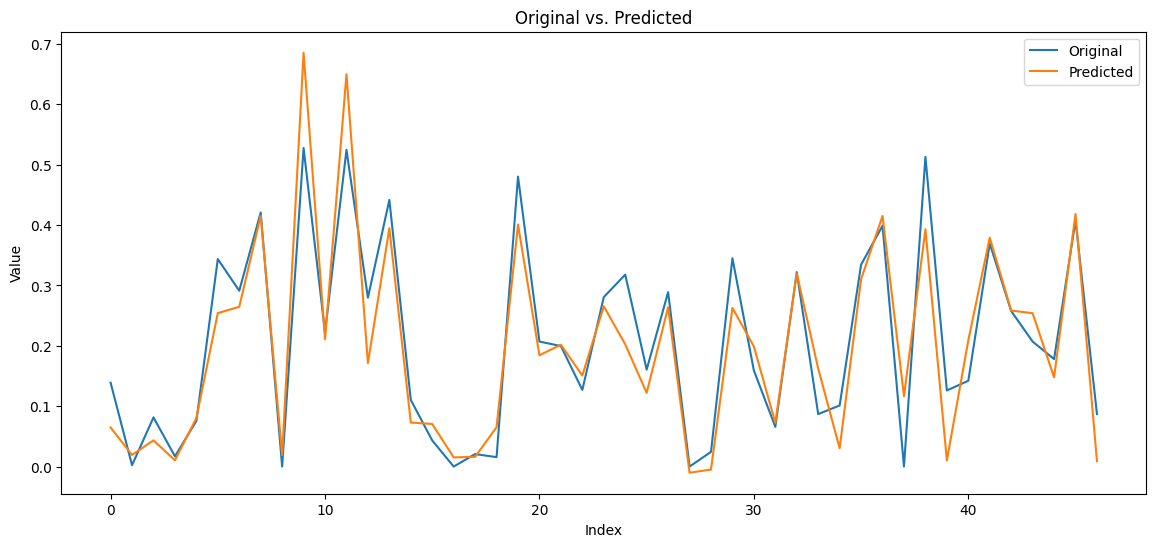

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Make predictions on the test set
y_pred = model.predict(X_test_rnn)

# Combine original and predicted values
results = pd.DataFrame({'Original': y_test_scaled.flatten(), 'Predicted': y_pred.flatten()})

# Plot original and predicted values
plt.figure(figsize=(14, 6))
plt.plot(results.index, results['Original'], label='Original')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs. Predicted')
plt.legend()
plt.show()


In [ ]:
original_data

,Sunspots
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [ ]:
num_rows = len(original_data) - 11  # Number of rows in the new DataFrame
num_cols = 12  # Number of columns in the new DataFrame

# Initialize an empty list to store the data for the new DataFrame
new_data = []

# Iterate over the rows of the original DataFrame
for i in range(num_rows):
    # Extract 12 values starting from the current index
    values = original_data.iloc[i:i+num_cols, 0].values  # Assumes the column of interest is the first column

    # Append the extracted values as a new row in the new data list
    new_data.append(values)

# Create a new DataFrame using the extracted data
new_df = pd.DataFrame(new_data, columns=[f'Column_{i+1}' for i in range(num_cols)])

print(new_df)

      Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0         58.0      62.6      70.0      55.7      85.0      83.5      94.8   
1         62.6      70.0      55.7      85.0      83.5      94.8      66.3   
2         70.0      55.7      85.0      83.5      94.8      66.3      75.9   
3         55.7      85.0      83.5      94.8      66.3      75.9      75.5   
4         85.0      83.5      94.8      66.3      75.9      75.5     158.6   
...        ...       ...       ...       ...       ...       ...       ...   
2804     118.8      94.7      98.1     127.0      84.3      51.0      66.5   
2805      94.7      98.1     127.0      84.3      51.0      66.5      80.7   
2806      98.1     127.0      84.3      51.0      66.5      80.7      99.2   
2807     127.0      84.3      51.0      66.5      80.7      99.2      91.1   
2808      84.3      51.0      66.5      80.7      99.2      91.1      82.2   

      Column_8  Column_9  Column_10  Column_11  Column_12  
0  

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler to your DataFrame and transform it
scaled_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)


In [ ]:
X1 = scaled_df.iloc[:, :-1]  # Features
y1 = scaled_df.iloc[:, -1]   # Target

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train1.shape[1], 1)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))  # Output layer with one neuron for regression
model.compile(optimizer='adam', loss='mse')  # Compile the model

# Train the model
model.fit(X_train1, y_train1, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test1, y_test1, verbose=0)
print("Mean Squared Error on Test Set:", mse)

Epoch 1/50
71/71 [==============================] - 4s 8ms/step - loss: 0.0100
Epoch 2/50
71/71 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 3/50
71/71 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 4/50
71/71 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 5/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 6/50
71/71 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 7/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 8/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 9/50
71/71 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 10/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 11/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 12/50
71/71 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 13/50
71/71 [==============================

18/18 [==============================] - 0s 5ms/step


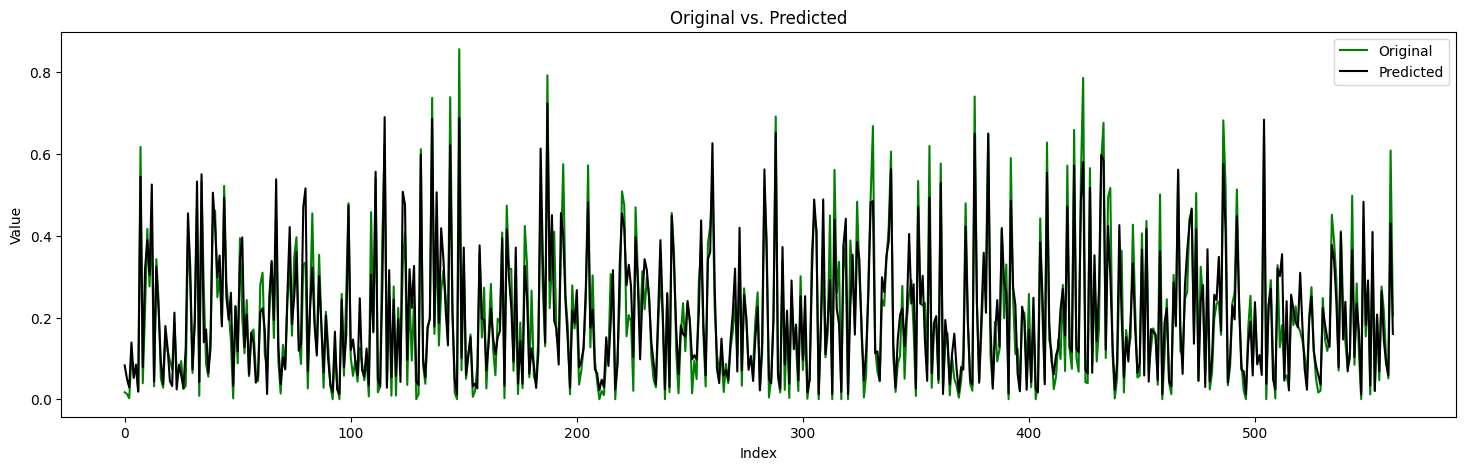

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Make predictions on the test set
y_pred2 = model.predict(X_test1)

# Combine original and predicted values
results2 = pd.DataFrame({'Original': y_test1.values, 'Predicted': y_pred2.flatten()})

# Plot original and predicted values
plt.figure(figsize=(18, 5))
plt.plot(results2.index, results2['Original'], label='Original', color='green')
plt.plot(results2.index, results2['Predicted'], label='Predicted', color='black')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs. Predicted')
plt.legend()
plt.show()
